# Predict Housing Pice

**Guidance**:
This notebook should include preliminary and baseline modeling.
- Try a variety of supervized learning models on your preprocessed data
- Don't worry about hyperparameter tuning or cross validation here.
- Ideas include:
    - linear regression
    - support vector machines
    - random forest
    - xgboost

* Decide on your criteria for model selection - what metrics are most important in this context? Describe your reasoning
* (Stretch) Even after preprocessing, you may have a lot of features, but they not all be needed to make an accurate prediction. Explore Feature Selection. How does this change model performance? Remember that a simpler model is generally preferred to a complex one if performance is similar

**Table of contents:**
* Part A - Implement baseline model on Full Feature Set
  1. linear regression
  2. support vector machines
  3. random forest
  4. xgboost
  5. kNN
  6. Gather evaluation metrics and compare results

* Part B - Implement baseline model on Reduced Feature Subset
  1. Feature Selection
  2. Refit models and comments

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions_visualization import def_Plot_Actual_vs_Predicted, plot_Evaluation_and_Residuals
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data

X_train = pd.read_csv('../data/csv_files/X_train_transformed.csv')  # scaled, formatted
y_train = pd.read_csv('../data/csv_files/y_train.csv')  
X_test = pd.read_csv('../data/csv_files/X_test_transformed.csv')    # scaled, formatted
y_test = pd.read_csv('../data/csv_files/y_test.csv')    

In [3]:
# Check shape
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((907, 31), (227, 31), (907, 1), (227, 1))

In [4]:
X_train.columns

Index(['numerical__state', 'numerical__city', 'numerical__year_built',
       'numerical__latitude', 'numerical__longitude', 'numerical__lot_sqft',
       'numerical__living_sqft', 'nominal__type_apartment',
       'nominal__type_mobile', 'nominal__type_multi_family',
       'nominal__type_single_family', 'nominal__type_townhouse',
       'remainder__number_of_stories', 'remainder__number_of_baths',
       'remainder__number_of_beds', 'remainder__number_of_garages',
       'remainder__basement', 'remainder__central_air',
       'remainder__central_heat', 'remainder__city_view',
       'remainder__community_outdoor_space',
       'remainder__community_security_features', 'remainder__fenced_yard',
       'remainder__fireplace', 'remainder__floor_plan',
       'remainder__hardwood_floors', 'remainder__new_roof',
       'remainder__recreation_facilities', 'remainder__rental_property',
       'remainder__shopping', 'remainder__view'],
      dtype='object')

In [5]:
# X_train.dtypes

# Part A - Implement baseline model on Full Feature Set

## 1. Linear Regression model

In [6]:
from sklearn.linear_model import LinearRegression
# Train model
model_LR = LinearRegression()   
model_LR.fit(X_train, y_train)

# Test model
y_pred_LR = model_LR.predict(X_test)    #  y_test is y_true

# Preliminary evaluation
print('    - R^2 of testing data:', model_LR.score(X_test, y_test))
print('    - R^2 of training data:', model_LR.score(X_train, y_train))

    - R^2 of testing data: 0.7505425368297133
    - R^2 of training data: 0.7193100856108807


* Generally, model score R-square is: 0.75  ---->  indicating that around 75% of the variance in the target variable is explained by the model ----> Linear Regression performs reasonably well.
* The difference in accuracy in prediction results between the training and testing sets is not large --> no indication of overfitting.
* More metrics will be evaluated later.

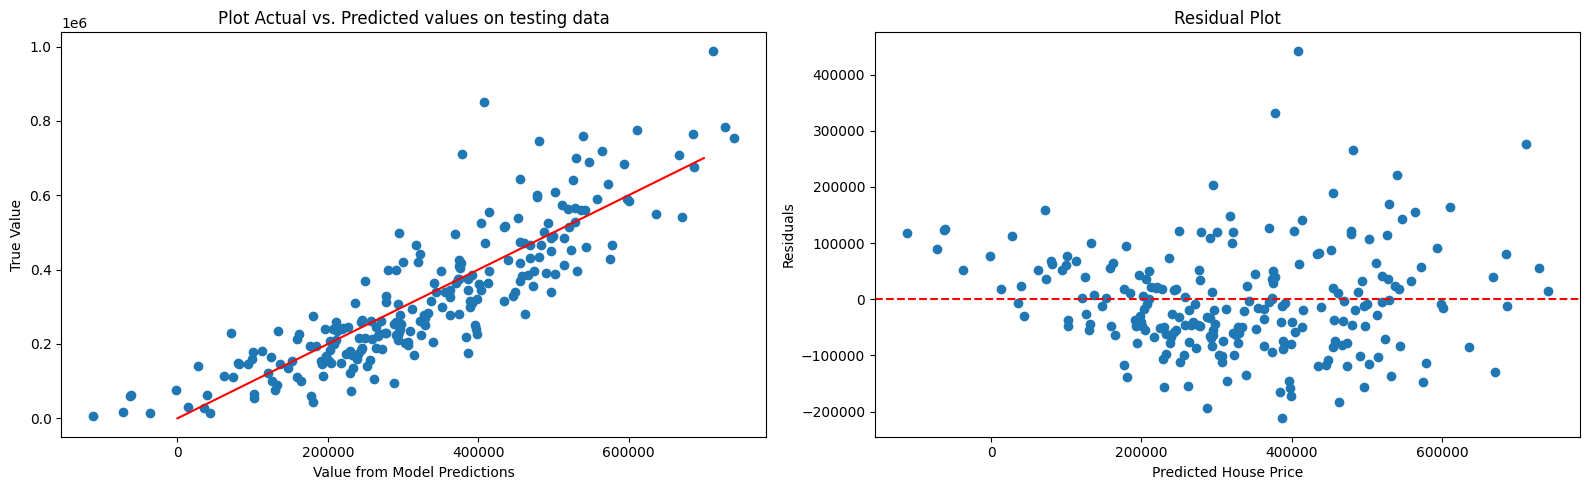

In [7]:
# Evaluating model by chart
plot_Evaluation_and_Residuals(y_pred_LR, y_test)

---->  This model predicts quite accurately.

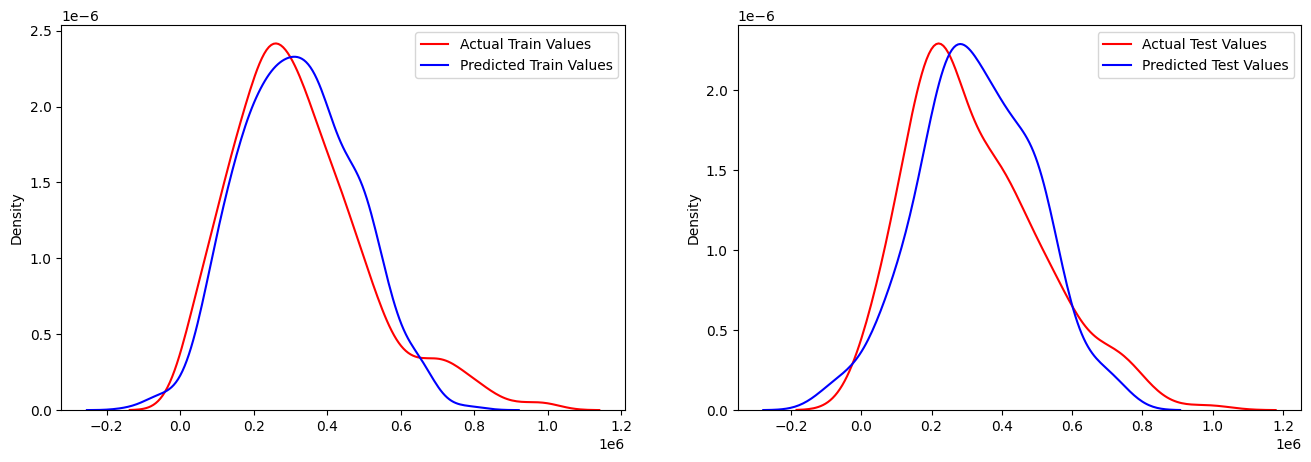

In [8]:
def_Plot_Actual_vs_Predicted(model_LR, y_train, y_test, X_train, X_test)

---->  This model predicts quite accurately.

## 2. Support Vector Machines (SVM) model

In [9]:
from sklearn.svm import SVR
# Train model
model_SV = SVR()
model_SV.fit(X_train, y_train)

# Test model
y_pred_SV = model_SV.predict(X_test)    #  y_test is y_true

# Preliminary evaluation
print('    - R^2 of testing data:', model_SV.score(X_test, y_test))
print('    - R^2 of training data:', model_SV.score(X_train, y_train))

    - R^2 of testing data: -0.023955095027557105
    - R^2 of training data: -0.020124071472217286


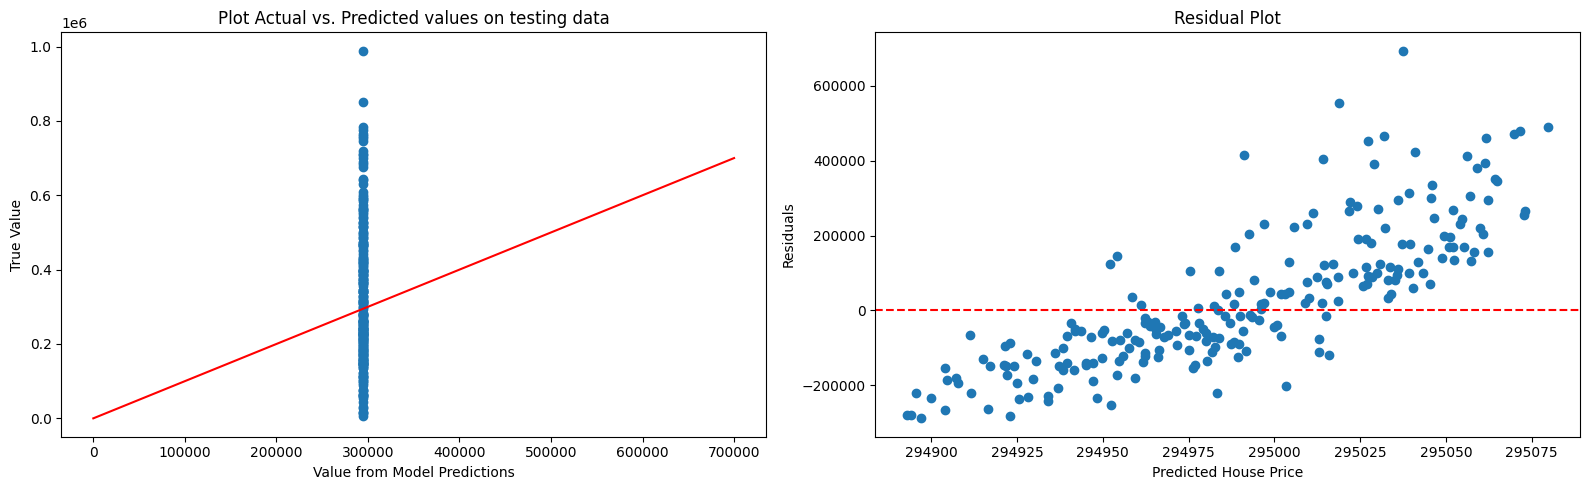

In [10]:
# Evaluating model by chart
plot_Evaluation_and_Residuals(y_pred_SV, y_test)

---> Apparently, this SVM model performs poorly. The negative R2 suggest that the model is worse than a horizontal line (mean of the target variable) and does not explain any variance in the target variable.

## 3. Random Forest model

In [11]:
from sklearn.ensemble import RandomForestRegressor
# Train model
model_RD = RandomForestRegressor(n_estimators=100)
model_RD.fit(X_train,y_train)

# Test model
y_pred_RD = model_RD.predict(X_test)    #  y_test is y_true

# Preliminary evaluation
print('    - R^2 of testing data:', model_RD.score(X_test, y_test))
print('    - R^2 of training data:', model_RD.score(X_train, y_train))

    - R^2 of testing data: 0.7964442889137925
    - R^2 of training data: 0.9610317593208463


* Generally, model score R-square of this model is: 0.796 ----> indicating that around 79.4% of the variance in the target variable is explained by the model  -----> Random Forest performs quite well.
* However, performance gap between training set and testing set is high => **Overfitting** occurs (This means that the model fits the training data almost perfectly, but it does not generalize as effectively to the test data).
* More metrics will be evaluated later.

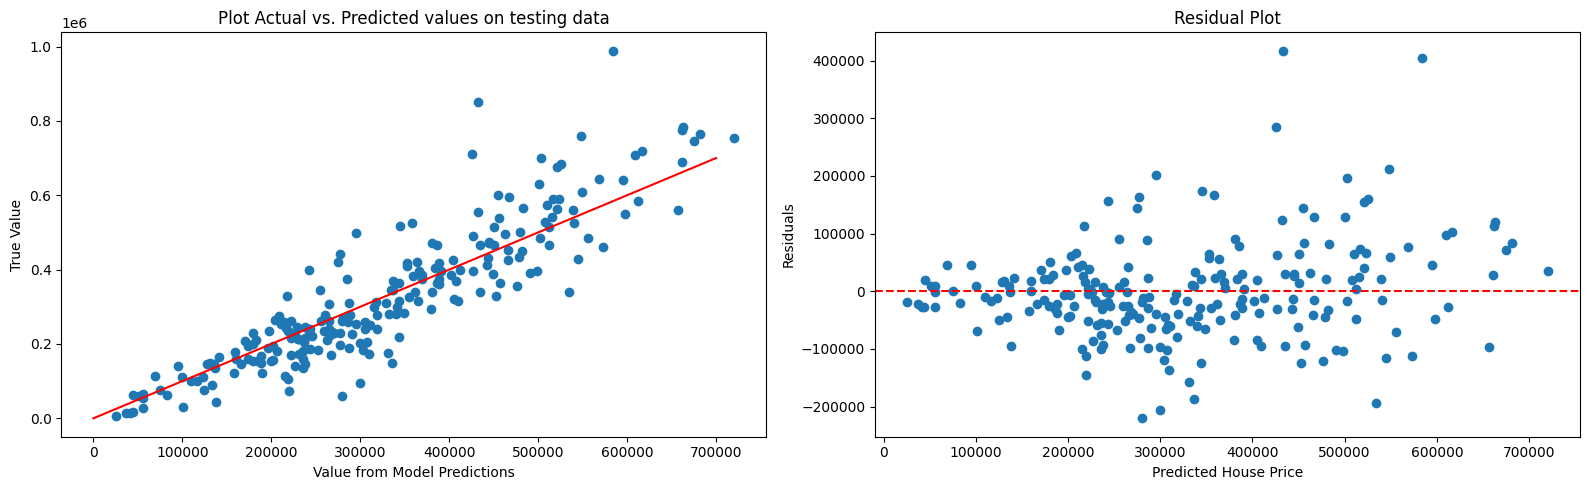

In [12]:
# Evaluating model by chart
plot_Evaluation_and_Residuals(y_pred_RD, y_test)

---->  This model predicts quite accurately.

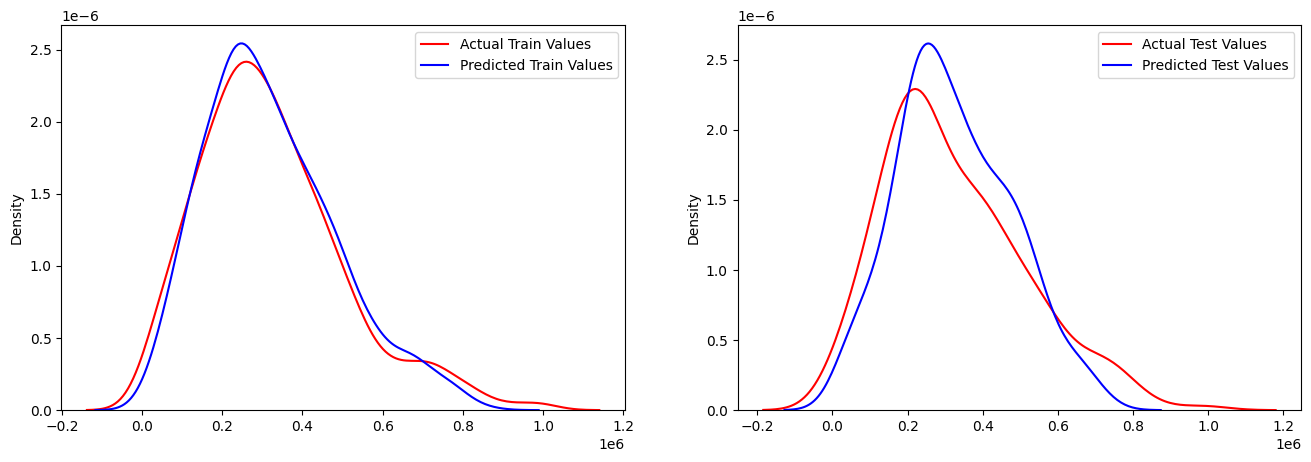

In [13]:
def_Plot_Actual_vs_Predicted(model_RD, y_train, y_test, X_train, X_test)

----> This model predicts quite accurately in the range of less than 210,000 dollars; around 210,000 dollars or more, there is an error. Moreover, we can observe the performance gap between training set and testing set through above graphs.

## 4. XGBoost model

In [14]:
from xgboost import XGBRegressor
# Train model
model_XG = XGBRegressor()
model_XG.fit(X_train, y_train)

# Test model
y_pred_XG = model_XG.predict(X_test)

# Preliminary evaluation
print('    - R^2 of testing data:', model_XG.score(X_test, y_test))
print('    - R^2 of training data:', model_XG.score(X_train, y_train))

    - R^2 of testing data: 0.8135845621372196
    - R^2 of training data: 0.9993266545517212


* Generally, model score R-square  is: 0.81 ----> indicating that around 81% of the variance is explained by the model. ---> XGBoost performs well.
* However, performance gap between training set and testing set is high => Overfitting issue (This means that the model fits the training data almost perfectly, but it does not generalize as effectively to the test data).
* More metrics will be evaluated later.

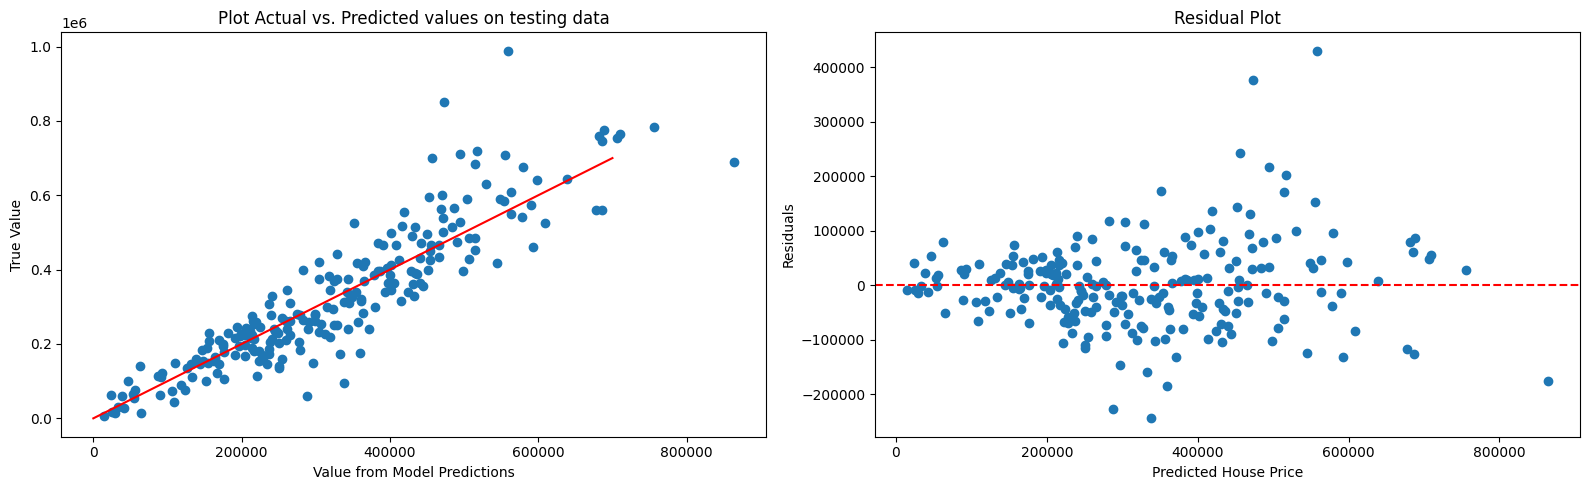

In [15]:
# Evaluating model by chart
plot_Evaluation_and_Residuals(y_pred_XG, y_test)

---->  This model predicts quite accurately.

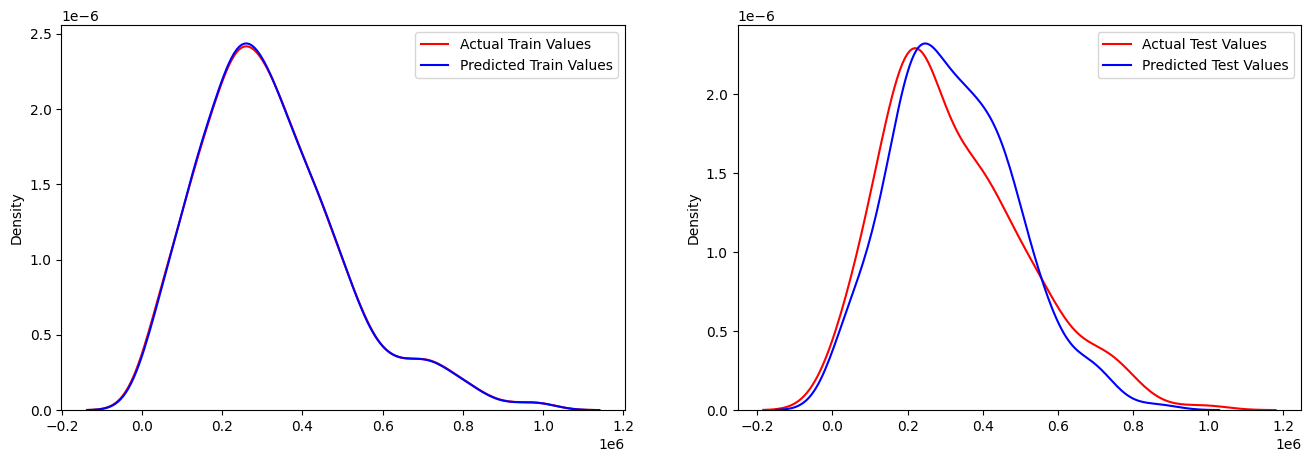

In [16]:
def_Plot_Actual_vs_Predicted(model_XG, y_train, y_test, X_train, X_test)

----> This model predicts pretty accurately in the range of less than 210,000 dollars; around 210,000 dollars or more, there is an error. Moreover, we can observe the performance gap between training set and testing set through above graphs.

## 5. KNN

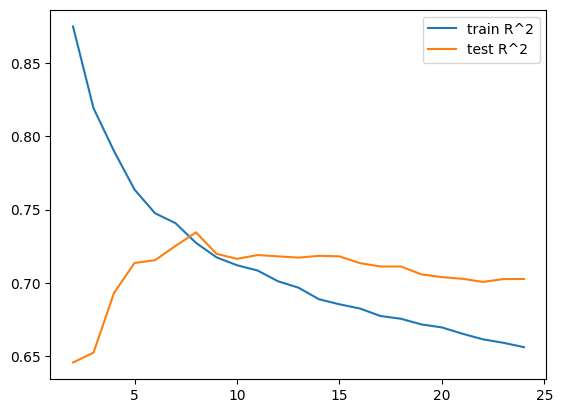

In [17]:
# Exame to see what k is reasonable
from sklearn.neighbors import KNeighborsRegressor
train_acc = []
test_acc = []
for k in range(2,25):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    tr_ac = neigh.score(X_train,y_train)
    te_ac = neigh.score(X_test,y_test)
    train_acc.append(tr_ac)
    test_acc.append(te_ac)

# plot accuracy to select k
from matplotlib import pyplot as plt
X_label = list(range(2,25))
plt.plot(X_label,train_acc,label='train R^2')
plt.plot(X_label,test_acc,label='test R^2')
plt.legend()
plt.show()

----> Let'see when try KNN model with k=7:

In [18]:
# Train model
k=7
model_KN = KNeighborsRegressor(n_neighbors=k)
model_KN.fit(X_train, y_train)

# Test model
y_pred_KN = model_KN.predict(X_test)

# Preliminary evaluation
print('    - R^2 of testing data:', model_KN.score(X_test, y_test))
print('    - R^2 of training data:', model_KN.score(X_train, y_train))

    - R^2 of testing data: 0.7253036148010544
    - R^2 of training data: 0.7407998668725279


* Generally, model score R-square of this model is: 0.725  ----> indicating that around 72.5% of the variance is explained by the model ----> KNN performs reasonably well.
* The difference in accuracy in prediction results between the training and testing sets is not large --> no overfitting occurs.
* More metrics will be evaluated later.

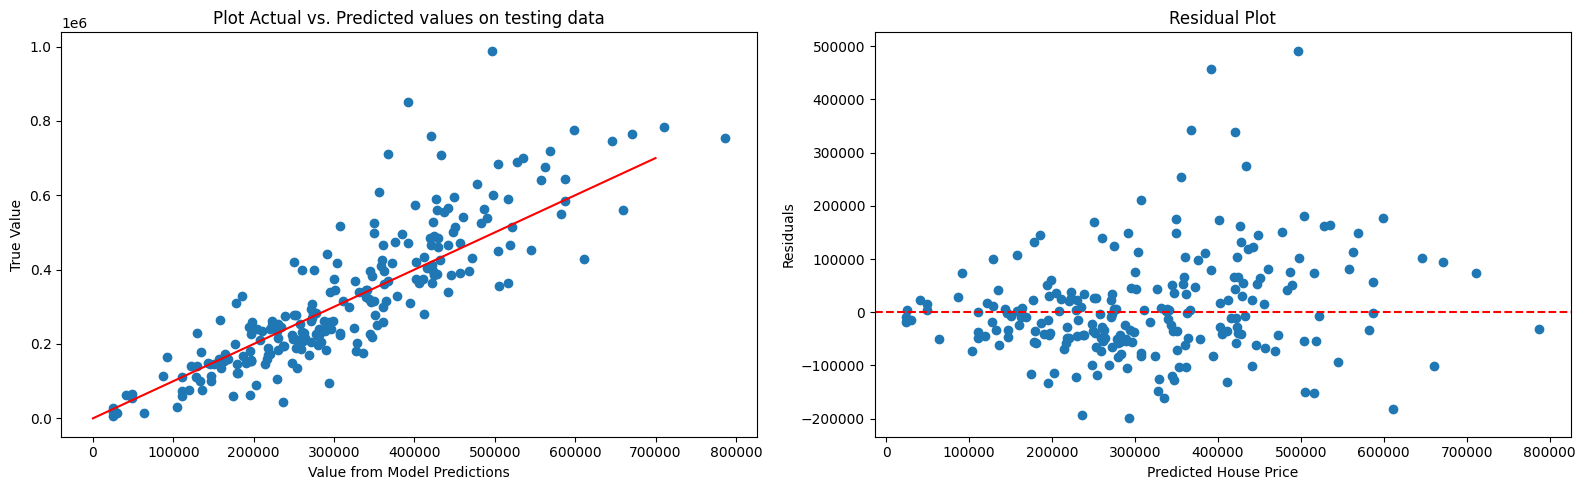

In [19]:
# Evaluating model by chart
plot_Evaluation_and_Residuals(y_pred_KN, y_test)

---->  This model predicts quite accurately.

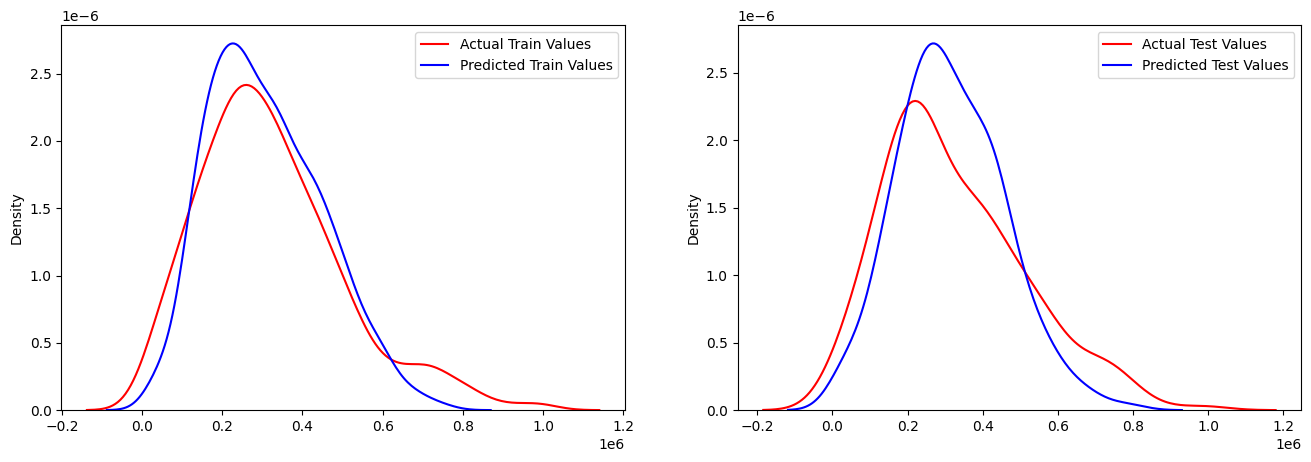

In [20]:
def_Plot_Actual_vs_Predicted(model_KN, y_train, y_test, X_train, X_test)

----> This model predicts quite accurately in the range of less than 200,000 dollars. Around 200,000 dollars or more, there is an error.

# 6. Gather evaluation metrics and compare results

### Considerations for Metric Selection

Decide on your criteria for model selection - what metrics are most important in this context?

The choice of evaluation metrics depends on the specific goals of the problem and the nature of the data.
* ERROR METRICs: help understand the model's error of prediction.
  1. MSE (Mean Squared Error) is the average of the squared errors. MSE can be very sensitive to outliers because the errors are squared before averaging.
  2. RMSE (Root Mean Squared Error) is the square root of MSE. RMSE helps understand the level of error in the same units as the target variable (dollars in this case), making it easier to visualize the error of prediction. However, RMSE is still sensitive to outliers since large errors also get squared, leading to a larger RMSE value if there are many outliers in dataset. It gives a sense of the spread of the errors.
  3. MAE (Mean Absolute Error) is the average of the absolute errors. MAE is not as sensitive to outliers as RMSE and can provide a more honest view of the average error.
  
  #### -------> Our dataset has pretty amount of outliers, so `MAE` metric is a good metric for this problem.
  
* ACCURACY METRICs: R^2 and Adjusted R^2 help understand the model's explanatory power.
  1. R^2 (Coefficient of Determination)indicates the proportion of the variance explained by the model. Higher values mean a better fit but can be misleading if there is overfitting.
  2. Adjusts R^2:  adjusts for the number of predictors in the model. This helps to avoid overfitting when adding more predictors that do not improve the model significantly.
  
  #### -------> We are using all of features for model --> there might be unuseful features for modelling --> so, `Adjusts R^2` might be better than R^2 in this case (providing a more accurate measure of model performance).

### Result Comparison

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Absolute Error (MAE)
mae_LR = mean_absolute_error(y_test, y_pred_LR)
mae_SV = mean_absolute_error(y_test, y_pred_SV)
mae_RD = mean_absolute_error(y_test, y_pred_RD)
mae_XG = mean_absolute_error(y_test, y_pred_XG)
mae_KN = mean_absolute_error(y_test, y_pred_KN)

# Root Mean Squared Error (RMSE)
rmse_LR = np.sqrt(mean_squared_error(y_test, y_pred_LR))
rmse_SV = np.sqrt(mean_squared_error(y_test, y_pred_SV))
rmse_RD = np.sqrt(mean_squared_error(y_test, y_pred_RD))
rmse_XG = np.sqrt(mean_squared_error(y_test, y_pred_XG))
rmse_KN = np.sqrt(mean_squared_error(y_test, y_pred_KN))

# R-squared (R2) _ Coefficient of Determination
r2_LR = r2_score(y_test, y_pred_LR)
r2_SV = r2_score(y_test, y_pred_SV)
r2_RD = r2_score(y_test, y_pred_RD)
r2_XG = r2_score(y_test, y_pred_XG)
r2_KN = r2_score(y_test, y_pred_KN)


# Adjusted R-squared
def adjusted_r2(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - n_features - 1)
    return adjusted_r2

adjusted_r2_LR = adjusted_r2(y_test, y_pred_LR, X_train.shape[1])
adjusted_r2_SV = adjusted_r2(y_test, y_pred_SV, X_train.shape[1])
adjusted_r2_RD = adjusted_r2(y_test, y_pred_RD, X_train.shape[1])
adjusted_r2_XG = adjusted_r2(y_test, y_pred_XG, X_train.shape[1])
adjusted_r2_KN = adjusted_r2(y_test, y_pred_KN, X_train.shape[1])

In [22]:
# Create a DataFrame to compare
metrics_data = {
    'MAE':         [mae_LR, mae_SV, mae_RD, mae_XG, mae_KN],
    'RMSE':        [rmse_LR, rmse_SV, rmse_RD, rmse_XG, rmse_KN],
    'R2':          [r2_LR, r2_SV, r2_RD, r2_XG, r2_KN],
    'Adjusted R2': [adjusted_r2_LR, adjusted_r2_SV, adjusted_r2_RD, adjusted_r2_XG, adjusted_r2_KN]
}

model_names = ['Linear Regression', 'SVM', 'Random Forest', 'XGBoost', 'KNN']

metrics_df = pd.DataFrame(metrics_data, index=model_names)
metrics_df

,MAE,RMSE,R2,Adjusted R2
Linear Regression,71914.946240,93631.367419,0.750543,0.710885
SVM,149766.129864,189698.357639,-0.023955,-0.186738
Random Forest,59564.758767,84579.431379,0.796444,0.764084
XGBoost,57112.786090,80940.158942,0.813585,0.783949
KNN,69675.476400,98253.852397,0.725304,0.681634


#### Comment:
------> Based on the provided metrics for each model in above table and additional information about overfitting, here are the observations:

* Best Model: While `XGBoost` has the highest Adjusted R2, the lowest MAE, but the significant overfitting reduces its reliability. `Random Forest` also shows good performance, but suffers from overfitting as well.
* Moderate Models: `Linear Regression`, and `KNN` provide reasonable performance without overfitting, making them more reliable despite not having the highest metrics.
* Poor Model: `SVM` performs the worst with high prediction errors and negative R2 values, indicating it is not suitable for this problem.

#### In conclusion, we can say that among these models, `XGBoost` is the best-performing model based on all metrics, with the lowest MAE and RMSE, and the highest R2 as well as Adjusted R2 values despite the existence of overfitting. It is worth considering the Linear regression model because it achieves positive results with no overfitting although the performance is lower than XGBoost and Random Forest.

=====> Given the overfitting issues, it may be worthwhile to consider model tuning, or more robust cross-validation techniques to improve generalizability.
=====> We will implement hyperparameter tuning for XGBoost, Random Forest, and Linear Regression later.
________________________

# Part B - Implement model on important features

## 1. Feature Selection 

In [23]:
data = pd.read_csv('../data/csv_files/cleaned_data_REDUCED_outliers.csv')

In [24]:
data.columns

Index(['sale_price', 'city', 'state', 'latitude', 'longitude', 'year_built',
       'type', 'lot_sqft', 'living_sqft', 'number_of_stories',
       'number_of_baths', 'number_of_beds', 'number_of_garages', 'basement',
       'central_air', 'central_heat', 'city_view', 'community_outdoor_space',
       'community_security_features', 'fenced_yard', 'fireplace', 'floor_plan',
       'hardwood_floors', 'new_roof', 'recreation_facilities',
       'rental_property', 'shopping', 'view'],
      dtype='object')

In [25]:
X_train.columns

Index(['numerical__state', 'numerical__city', 'numerical__year_built',
       'numerical__latitude', 'numerical__longitude', 'numerical__lot_sqft',
       'numerical__living_sqft', 'nominal__type_apartment',
       'nominal__type_mobile', 'nominal__type_multi_family',
       'nominal__type_single_family', 'nominal__type_townhouse',
       'remainder__number_of_stories', 'remainder__number_of_baths',
       'remainder__number_of_beds', 'remainder__number_of_garages',
       'remainder__basement', 'remainder__central_air',
       'remainder__central_heat', 'remainder__city_view',
       'remainder__community_outdoor_space',
       'remainder__community_security_features', 'remainder__fenced_yard',
       'remainder__fireplace', 'remainder__floor_plan',
       'remainder__hardwood_floors', 'remainder__new_roof',
       'remainder__recreation_facilities', 'remainder__rental_property',
       'remainder__shopping', 'remainder__view'],
      dtype='object')

In [26]:
# Handle property type back after OneHotEncoder
def restore_original_type(row):
    if row['nominal__type_single_family'] == 1:
        return 1
    elif row['nominal__type_multi_family'] == 1:
        return 2
    elif row['nominal__type_townhouse'] == 1:
        return 3
    elif row['nominal__type_apartment'] == 1:
        return 4
    elif row['nominal__type_mobile'] == 1:
        return 5
        
X_train['type'] = X_train.apply(restore_original_type, axis=1)
X_train.drop(columns=['nominal__type_single_family', 'nominal__type_multi_family', 
                      'nominal__type_townhouse', 'nominal__type_apartment', 'nominal__type_mobile'], inplace=True)

In [27]:
X_train.columns

Index(['numerical__state', 'numerical__city', 'numerical__year_built',
       'numerical__latitude', 'numerical__longitude', 'numerical__lot_sqft',
       'numerical__living_sqft', 'remainder__number_of_stories',
       'remainder__number_of_baths', 'remainder__number_of_beds',
       'remainder__number_of_garages', 'remainder__basement',
       'remainder__central_air', 'remainder__central_heat',
       'remainder__city_view', 'remainder__community_outdoor_space',
       'remainder__community_security_features', 'remainder__fenced_yard',
       'remainder__fireplace', 'remainder__floor_plan',
       'remainder__hardwood_floors', 'remainder__new_roof',
       'remainder__recreation_facilities', 'remainder__rental_property',
       'remainder__shopping', 'remainder__view', 'type'],
      dtype='object')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

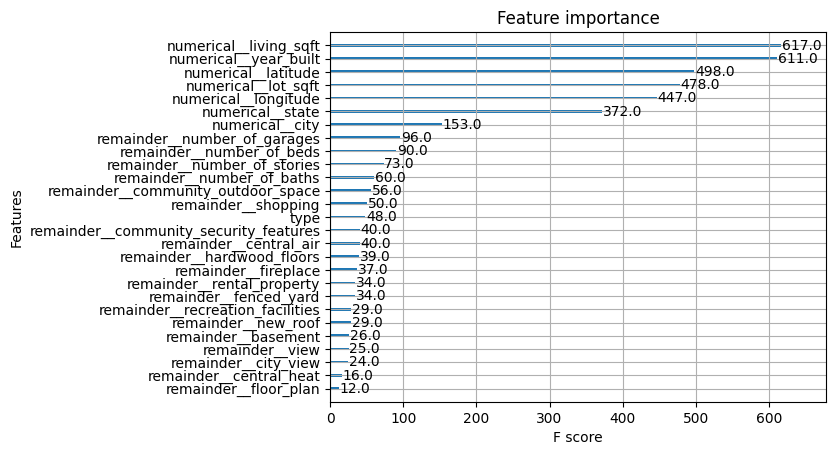

In [28]:
# Feature Imporance
from xgboost import XGBRegressor
from xgboost import plot_importance

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
plot_importance(xgb)

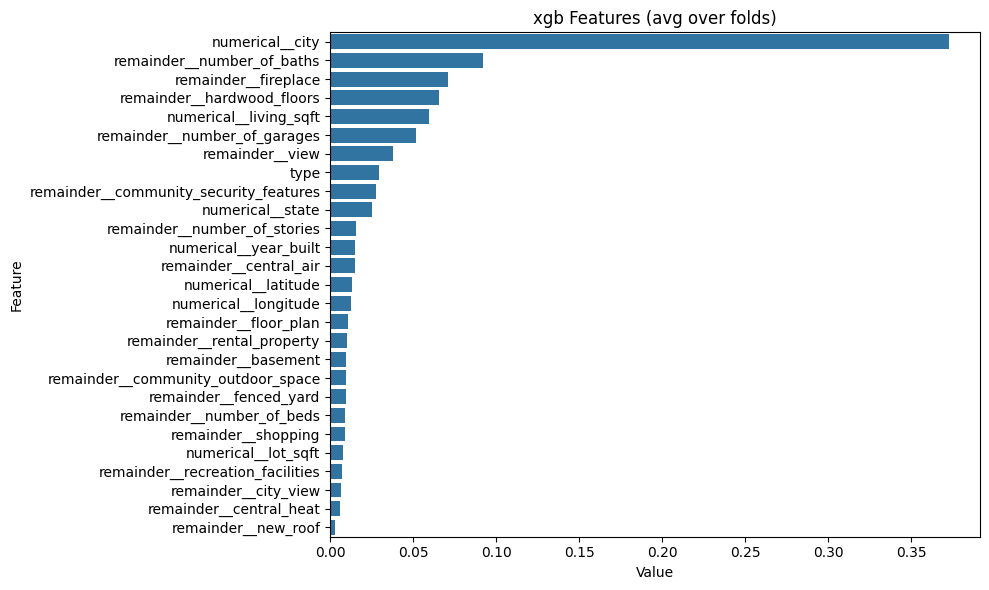

<Figure size 640x480 with 0 Axes>

In [29]:
feature_imp = pd.DataFrame(sorted(zip(xgb.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('xgb Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('../images/xgb_importances-01.png')

Based on two graph, we will try modelling with small feature subset as below:

## 2. Refit models

#### With 'type' is ORDINAL variable

In [30]:
########## With 'type' is ORDINAL
feature_selection = ['numerical__living_sqft', 'numerical__lot_sqft', 'numerical__year_built',
            'numerical__latitude', 'numerical__longitude',
            'numerical__state', 'numerical__city', 'remainder__number_of_stories', 'remainder__number_of_baths',
            'remainder__number_of_beds', 'remainder__number_of_garages', 'remainder__central_air', 
            'remainder__community_outdoor_space', 'remainder__hardwood_floors', 'remainder__basement', 
            'remainder__view', 'remainder__community_security_features', 'remainder__recreation_facilities', 'type']
# 18 features 

# Handle 'type' for X_test
X_test['type'] = X_test.apply(restore_original_type, axis=1)
X_test.drop(columns=['nominal__type_single_family', 'nominal__type_multi_family', 
                      'nominal__type_townhouse', 'nominal__type_apartment', 'nominal__type_mobile'], inplace=True)
# Prepare data
X_train = X_train[feature_selection]
X_test = X_test[feature_selection]

# Train model
model_XG = XGBRegressor()
model_XG.fit(X_train, y_train)

#Test model
y_pred_XG = model_XG.predict(X_test)

# Preliminary evaluation
print('    - R^2 of testing data:', model_XG.score(X_test, y_test))
print('    - R^2 of training data:', model_XG.score(X_train, y_train))
print("    - Mean Absolute Error on testing data: ", mean_absolute_error(y_test, y_pred_XG))

    - R^2 of testing data: 0.7912788347332481
    - R^2 of training data: 0.9994109574911016
    - Mean Absolute Error on testing data:  61351.065741316335


#### With 'type' is NOMINAL variable

In [31]:
########## 'type' is NOMINAL variable
# Prepare data (Load and use original data because 'type' was reversely encoded and became Ordinal variable in above)

X_train = pd.read_csv('../data/csv_files/X_train_transformed.csv')  # scaled, formatted
X_test = pd.read_csv('../data/csv_files/X_test_transformed.csv')  # scaled, formatted

feature_selection = ['numerical__living_sqft', 'numerical__lot_sqft', 'numerical__year_built', 'numerical__latitude', 
                    'numerical__longitude', 'numerical__state', 'numerical__city', 'remainder__number_of_stories',
                    'remainder__number_of_baths', 'remainder__number_of_beds', 'remainder__number_of_garages',
                    'remainder__central_air', 'remainder__community_outdoor_space', 'remainder__hardwood_floors',
                    'remainder__basement', 'remainder__view', 'remainder__community_security_features', 
                    'remainder__recreation_facilities', 
                        'nominal__type_apartment', 'nominal__type_mobile', 'nominal__type_multi_family', 
                        'nominal__type_single_family','nominal__type_townhouse']
X_train = X_train[feature_selection]
X_test = X_test[feature_selection]

# Train model
model_XG = XGBRegressor()
model_XG.fit(X_train, y_train)

# Test model
y_pred_XG = model_XG.predict(X_test)

# Preliminary evaluation
print('    - R^2 of testing data:', model_XG.score(X_test, y_test))
print('    - R^2 of training data:', model_XG.score(X_train, y_train))
print("    - Mean Absolute Error on testing data: ", mean_absolute_error(y_test, y_pred_XG))

    - R^2 of testing data: 0.7855697355483584
    - R^2 of training data: 0.9995127248331708
    - Mean Absolute Error on testing data:  60358.00122554292


### Comment:
* We can notice that the performance doesn't improved, not good as the intial with all features.
* Here also answer for the question about should treating propery type feature as nominal or ordinal variable. There is no significant difference.

In [32]:
#### Try with smaller subset

feature_selection = ['numerical__living_sqft', 'numerical__lot_sqft', 'numerical__year_built', 'numerical__latitude', 
                     'numerical__longitude', 'numerical__state', 'numerical__city', 'remainder__number_of_stories',
                        'nominal__type_apartment', 'nominal__type_mobile', 'nominal__type_multi_family', 
                        'nominal__type_single_family','nominal__type_townhouse']
X_train = X_train[feature_selection]
X_test = X_test[feature_selection]

# Train model
model_XG = XGBRegressor()
model_XG.fit(X_train, y_train)

# Test model
y_pred_XG = model_XG.predict(X_test)

# Preliminary evaluation
print('    - R^2 of testing data:', model_XG.score(X_test, y_test))
print('    - R^2 of training data:', model_XG.score(X_train, y_train))
print("    - Mean Absolute Error on testing data: ", mean_absolute_error(y_test, y_pred_XG))

    - R^2 of testing data: 0.7536568004620625
    - R^2 of training data: 0.9983525229764365
    - Mean Absolute Error on testing data:  64974.002942593615


### Comment:
Feature selection in this case doesn't improve model performance; arguably not as good as using all the features.